# Análisis Exploratorio — Telco Customer Churn  
**Exploración de patrones y factores asociados al abandono de clientes**

## Objetivo

Este notebook tiene como finalidad identificar patrones y relaciones entre variables que expliquen el fenómeno de churn en el sector telecomunicaciones.

Se busca responder a la pregunta:  
> *¿Qué características diferencian a los clientes que abandonan del resto?*

Esto permitirá generar hipótesis valiosas para el negocio y orientar el posterior modelado predictivo.


## 1. Carga de datos y configuración inicial

Se importan las librerías necesarias para el análisis exploratorio, incluyendo `pandas` para manipulación de datos y `seaborn` y `matplotlib` para visualización.

Se establece un estilo visual uniforme para los gráficos y un tamaño estándar para las figuras, mejorando la legibilidad.

Finalmente, se carga el dataset limpio previamente generado en el paso de preprocesamiento y se verifica su tamaño y estructura con una vista previa de las primeras filas.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

df = pd.read_csv('../data/processed/clean_telco.csv')

print(f"Shape final: {df.shape}")
df.head()


Shape final: (7010, 22)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MultipleServices
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-6,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-6,3
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6,1


## 2. Distribución del target: Churn

Se analiza la proporción de clientes que han abandonado el servicio (`Churn`) frente a los que permanecen.

El conteo absoluto y el porcentaje permiten entender el balance del dataset, aspecto fundamental para seleccionar técnicas adecuadas en el modelado.

La visualización gráfica muestra claramente que aproximadamente un 26.5% de los clientes han cancelado, indicando un problema presente pero moderadamente desbalanceado.


Churn
No     73.509272
Yes    26.490728
Name: proportion, dtype: float64


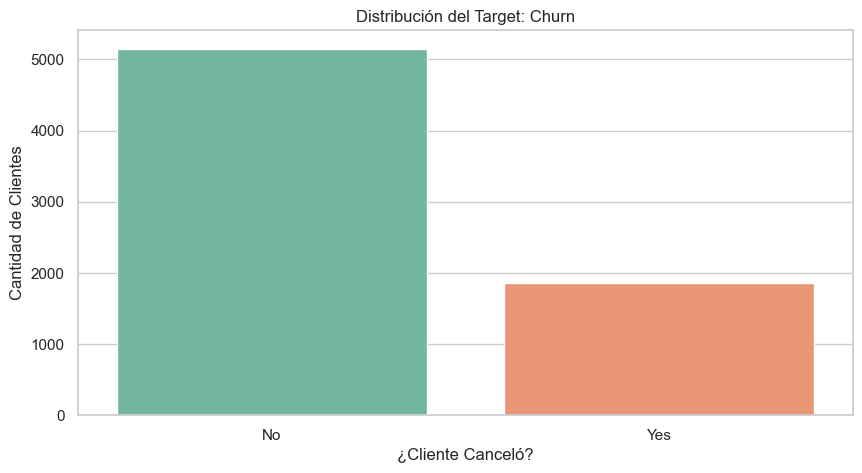

In [2]:
# Conteo absoluto y porcentaje
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print(churn_dist)

sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución del Target: Churn')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('¿Cliente Canceló?')
plt.show()


## 3. Distribución de la antigüedad de los clientes (`tenure`)

Se examina cómo se distribuyen los meses de permanencia de los clientes en la empresa.

La gráfica revela una concentración importante tanto en clientes recientes (0 a 6 meses) como en clientes con larga permanencia (más de 48 meses).

Este patrón indica que, aunque hay una base sólida de clientes fieles, existe un volumen considerable de usuarios nuevos que podrían estar en mayor riesgo de abandono.


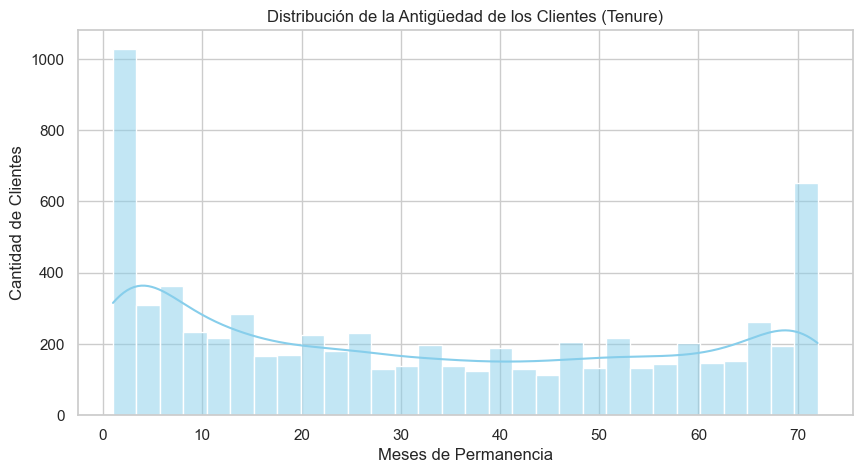

In [3]:
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Antigüedad de los Clientes (Tenure)')
plt.xlabel('Meses de Permanencia')
plt.ylabel('Cantidad de Clientes')
plt.show()


## 4. Distribución de los cargos mensuales (`MonthlyCharges`)

Se analiza la distribución de los cargos mensuales que los clientes pagan por sus servicios.

La mayoría de los cargos se concentra entre 60 y 100 USD, sin modas claras, aunque con una ligera tendencia hacia montos elevados.

Esta distribución puede reflejar la diversidad de planes y niveles de servicio contratados por los clientes.


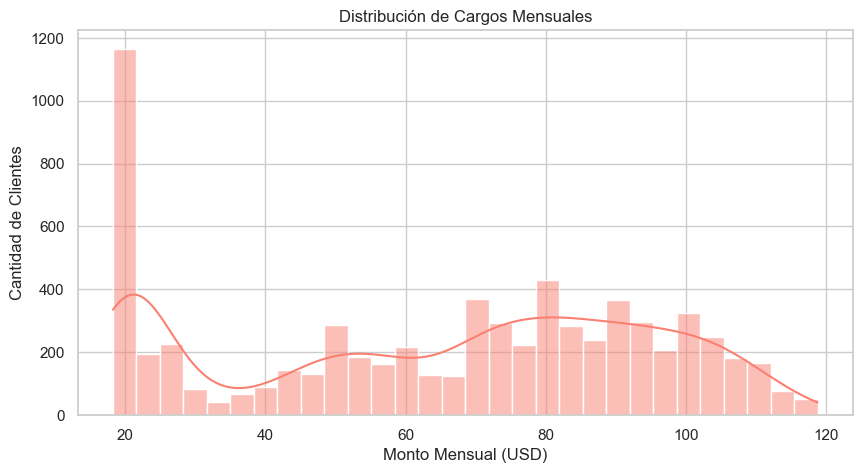

In [4]:
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Monto Mensual (USD)')
plt.ylabel('Cantidad de Clientes')
plt.show()


## 5. Distribución del monto total facturado (`TotalCharges`)

Se evalúa la distribución acumulada de los cargos totales facturados a cada cliente durante su permanencia.

La gráfica muestra una distribución asimétrica hacia la derecha, donde la mayoría de los clientes acumula montos bajos, debido a una combinación de cargos moderados y baja antigüedad.

Un pequeño grupo de clientes representa a los más longevos y rentables, con valores altos acumulados.


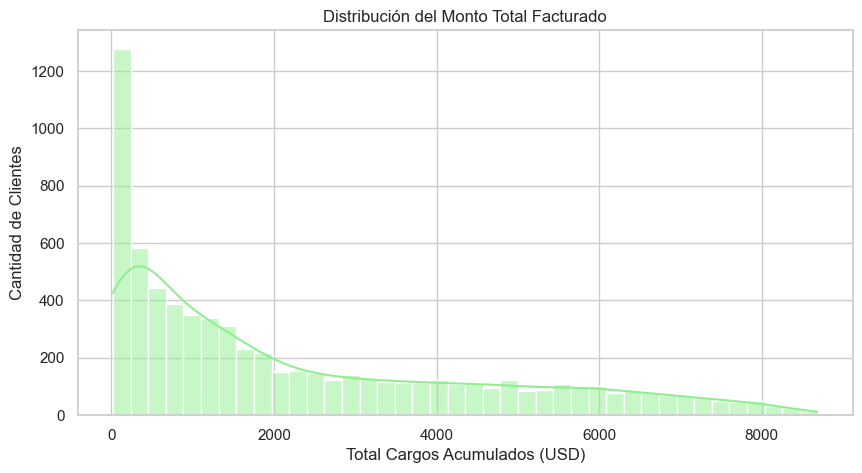

In [5]:
sns.histplot(df['TotalCharges'], bins=40, kde=True, color='lightgreen')
plt.title('Distribución del Monto Total Facturado')
plt.xlabel('Total Cargos Acumulados (USD)')
plt.ylabel('Cantidad de Clientes')
plt.show()


## 6. Distribución de la antigüedad (`tenure`) según churn

Se compara la permanencia de los clientes que abandonan frente a los que permanecen mediante un diagrama de caja.

Los clientes que permanecen tienen una mediana de permanencia considerablemente mayor.

Queda claro que quienes churnean suelen tener menos de 20 meses, confirmando una relación inversa entre antigüedad y riesgo de abandono.


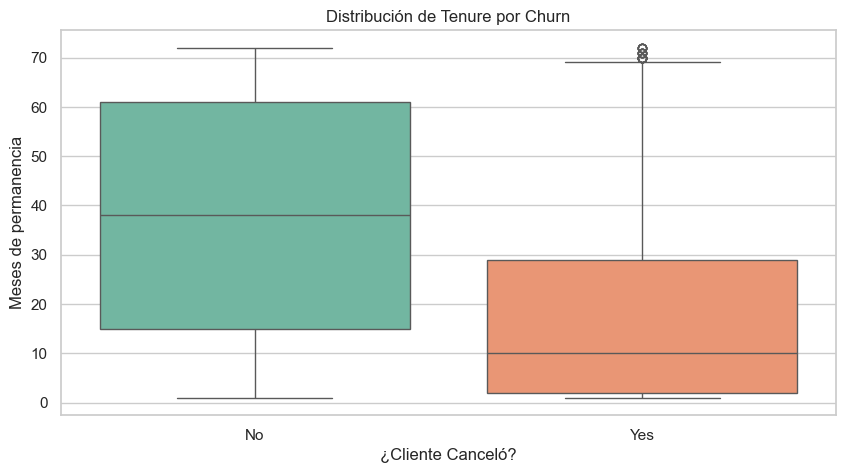

In [6]:
sns.boxplot(data=df, x='Churn', hue='Churn', y='tenure', palette='Set2')
plt.title('Distribución de Tenure por Churn')
plt.ylabel('Meses de permanencia')
plt.xlabel('¿Cliente Canceló?')
plt.show()

## 7. Distribución de cargos mensuales (`MonthlyCharges`) según churn

Se examina cómo varían los cargos mensuales entre clientes que abandonan y los que permanecen.

Los clientes que churnean tienden a tener cargos mensuales más altos en promedio.

Esto puede indicar una percepción de bajo valor por el precio pagado o una sobreventa de servicios que no se utilizan plenamente, aunque no es concluyente por sí solo.

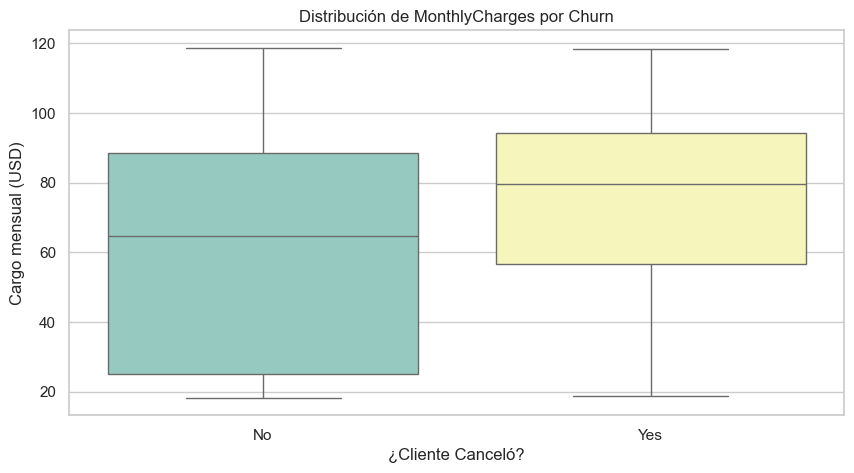

In [7]:
sns.boxplot(data=df, x='Churn', hue='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Distribución de MonthlyCharges por Churn')
plt.ylabel('Cargo mensual (USD)')
plt.xlabel('¿Cliente Canceló?')
plt.show()


## 8. Distribución del monto total facturado (`TotalCharges`) según churn

Se analiza la relación entre el total facturado y la condición de abandono del cliente.

Los clientes que han cancelado muestran, en general, valores acumulados mucho menores, en línea con su menor antigüedad y vinculación.

Este patrón reafirma que la permanencia prolongada está asociada a mayor contribución económica y menor probabilidad de churn.


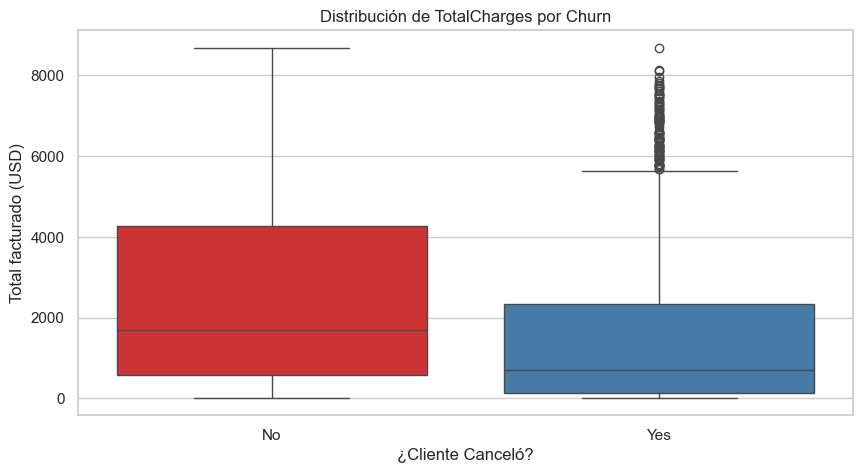

In [8]:
sns.boxplot(data=df, x='Churn', hue='Churn', y='TotalCharges', palette='Set1')
plt.title('Distribución de TotalCharges por Churn')
plt.ylabel('Total facturado (USD)')
plt.xlabel('¿Cliente Canceló?')
plt.show()


## 9. Función para visualizar la tasa de churn por variable categórica

Se define una función que calcula y grafica la proporción de clientes que churnean y no churnean, agrupados por categorías de una variable específica.

La visualización en barras apiladas facilita la comparación del churn relativo entre diferentes niveles de la variable, apoyando la identificación de patrones y factores asociados al abandono.


In [9]:
def churn_ratio_plot(col):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
    plt.title(f'Tasa de Churn según {col}')
    plt.ylabel('% de Clientes')
    plt.xlabel(col)
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 10. Tasa de churn según tipo de contrato

Se analiza cómo la modalidad del contrato afecta la probabilidad de abandono.

Los contratos mes a mes presentan una tasa de churn significativamente más alta, mientras que los contratos a uno o dos años muestran mejor retención.

Esto es coherente con la expectativa de que los contratos a largo plazo generan mayor compromiso y penalidades por cancelación anticipada.


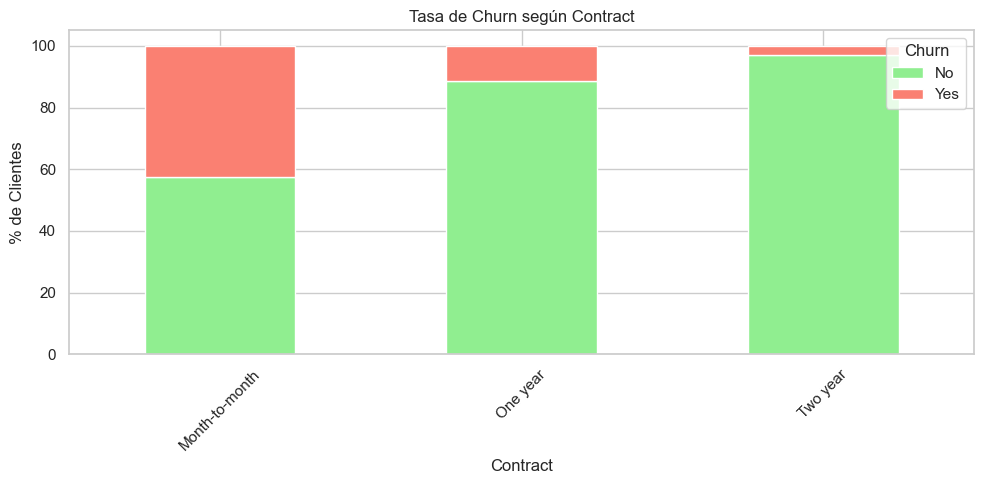

In [10]:
churn_ratio_plot('Contract')


## 11. Tasa de churn según tipo de servicio de Internet

Se examina la influencia del tipo de servicio de Internet contratado en la tasa de abandono.

Los clientes con servicio de fibra óptica (`Fiber optic`) presentan la tasa de churn más alta, posiblemente debido a precios más elevados o problemas de calidad.

Quienes no cuentan con servicio de Internet muestran tasas de churn mucho más bajas, probablemente porque usan solo telefonía básica.


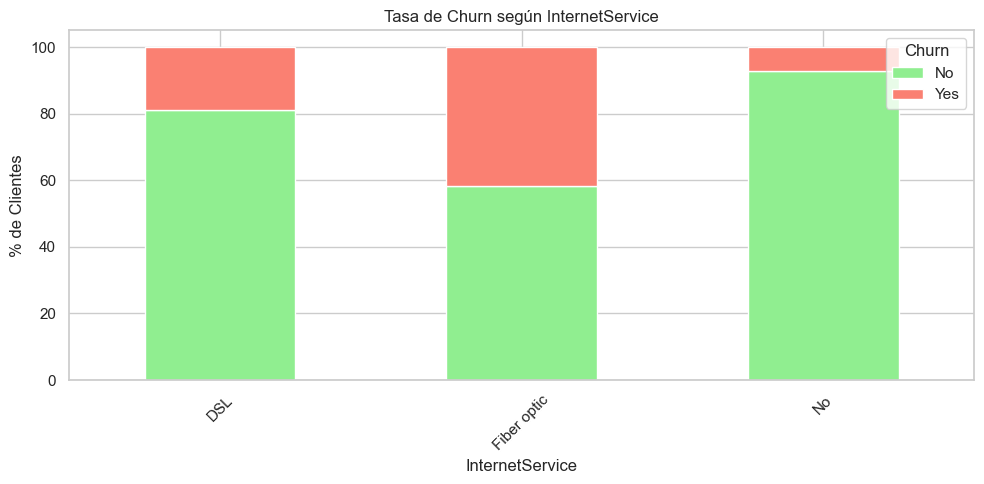

In [11]:
churn_ratio_plot('InternetService')


## 12. Tasa de churn según disponibilidad de soporte técnico

Se analiza la relación entre la contratación de soporte técnico y la tasa de abandono.

Los clientes que no cuentan con soporte técnico presentan una tasa de churn notablemente más alta.

Este hallazgo sugiere que ofrecer soporte técnico puede ser un factor clave para mejorar la retención y reducir el churn.


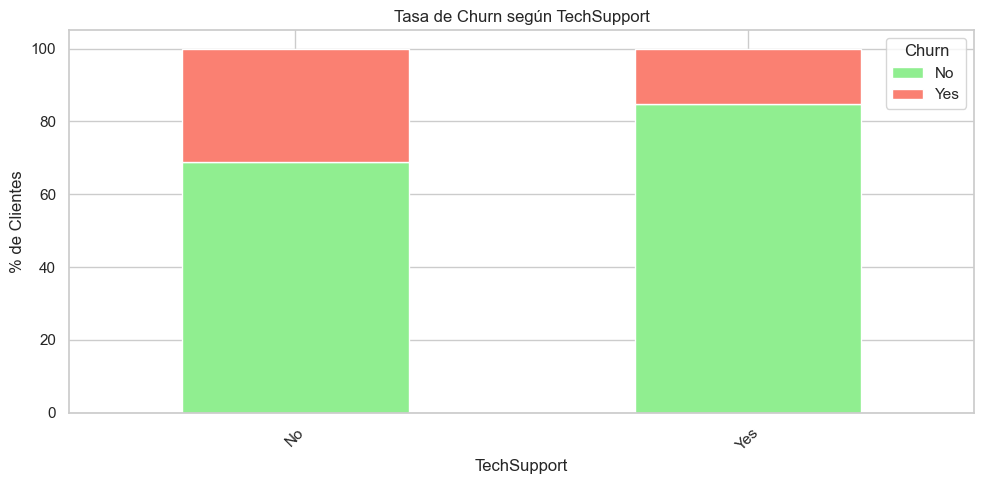

In [12]:
churn_ratio_plot('TechSupport')


## 13. Tasa de churn según método de pago

Se evalúa cómo el método de pago influye en la probabilidad de abandono.

Los clientes que utilizan cheque electrónico presentan la mayor tasa de churn, mientras que los métodos automáticos (débito automático, tarjeta de crédito) muestran menor abandono.

Esto sugiere que facilitar métodos de pago automáticos podría contribuir a la retención de clientes.


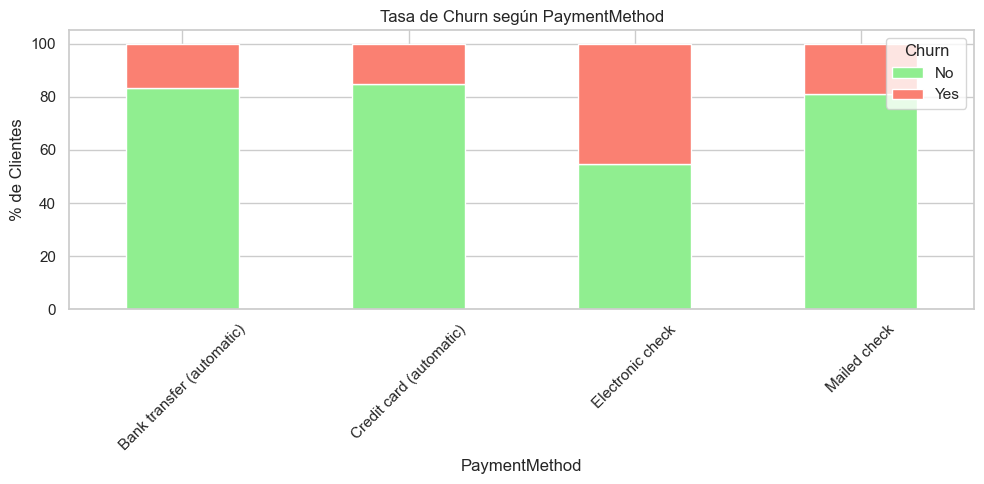

In [13]:
churn_ratio_plot('PaymentMethod')


## 14. Tasa de churn según grupo de antigüedad (`tenure_group`)

Se observa cómo varía la tasa de abandono según los intervalos de permanencia de los clientes.

La tasa de churn es más alta en el grupo de clientes con 0 a 6 meses de antigüedad y disminuye progresivamente conforme aumenta la permanencia.

Este patrón resalta la importancia crítica de la etapa inicial para la retención de clientes.


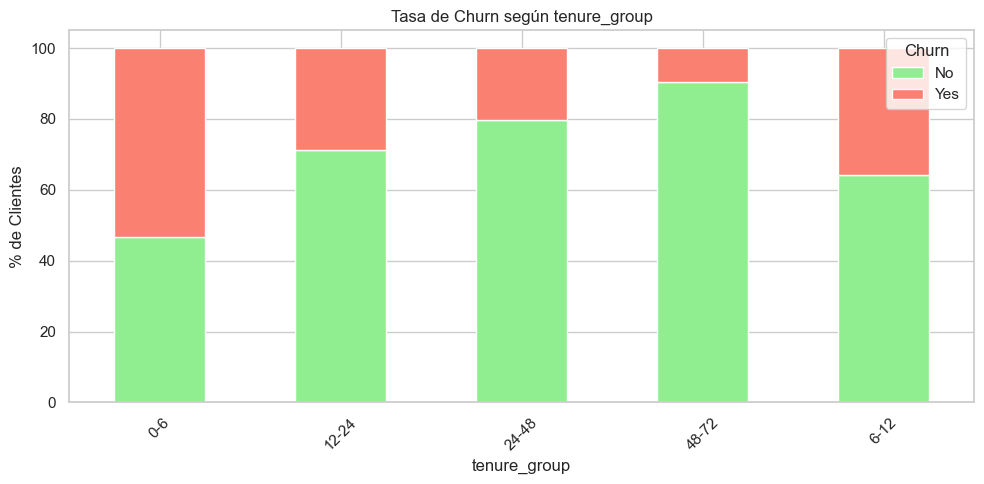

In [14]:
churn_ratio_plot('tenure_group')


### 15. Tasa de churn según tipo de facturación (`PaperlessBilling`)

Se analiza la influencia del uso de facturación electrónica en la tasa de abandono.

Los clientes con facturación electrónica muestran una tasa de churn considerablemente mayor.

Esto podría indicar que estos usuarios tienen un perfil más autónomo y menos vinculado, lo que puede aumentar la probabilidad de cancelación.


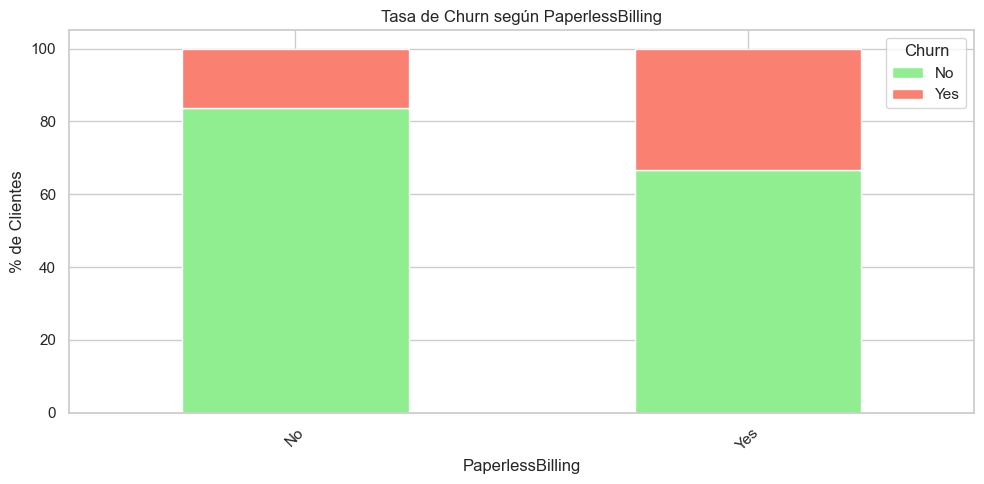

In [15]:
churn_ratio_plot('PaperlessBilling')


### 16. Tasa de churn según número de servicios contratados (`MultipleServices`)

Se evalúa la relación entre la cantidad de servicios que tiene un cliente y su probabilidad de abandono.

Los clientes que solo tienen un servicio, como internet o teléfono, muestran tasas de churn más altas.

En contraste, quienes cuentan con múltiples servicios combinados presentan una tasa de abandono mucho menor, reflejando una mayor vinculación y un mayor coste percibido para cancelar.

Este patrón es típico en el sector de telecomunicaciones, donde la oferta combinada (bundling) contribuye a la retención.

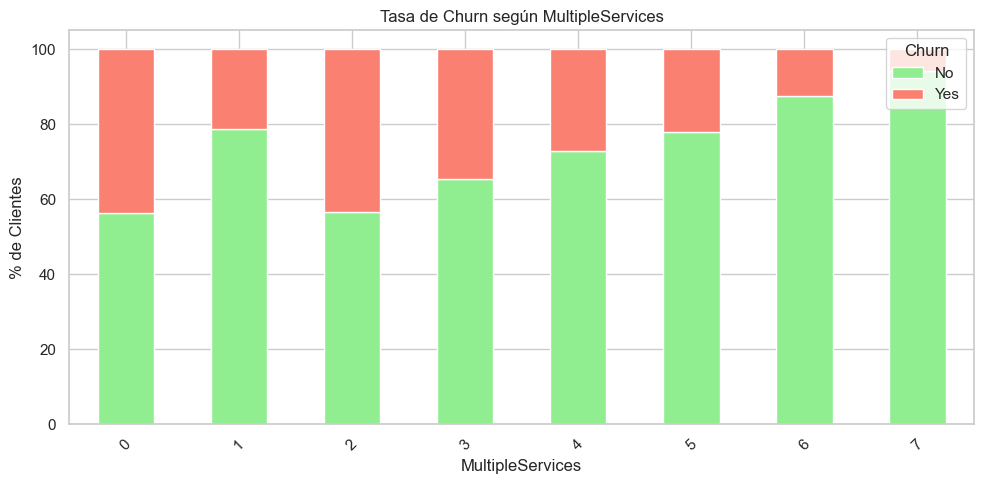

In [16]:
churn_ratio_plot('MultipleServices')


### 17. Tasa de churn según contratación de seguridad en línea (`OnlineSecurity`)

Se analiza cómo la presencia o ausencia del servicio de seguridad online influye en la tasa de abandono.

Los clientes que no tienen contratado este servicio presentan una mayor probabilidad de churn.

Esto sugiere que la percepción de protección y cuidado que brinda la seguridad online puede fortalecer la confianza del cliente y reducir la deserción.


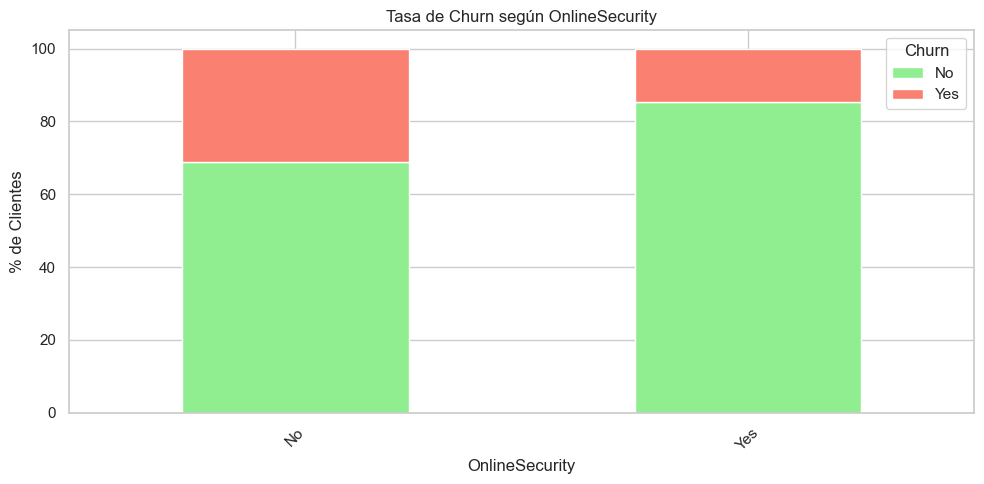

In [17]:
churn_ratio_plot('OnlineSecurity')


### 18. Tasa de churn según contratación de servicio de streaming de TV (`StreamingTV`)

Se examina la relación entre la contratación del servicio de streaming de TV y la tasa de abandono.

Aunque la diferencia no es tan marcada, los clientes que no cuentan con este servicio tienden a mostrar tasas de churn ligeramente más altas.

Esto podría reflejar un perfil de usuario con menor nivel de uso o menor integración digital con la empresa.

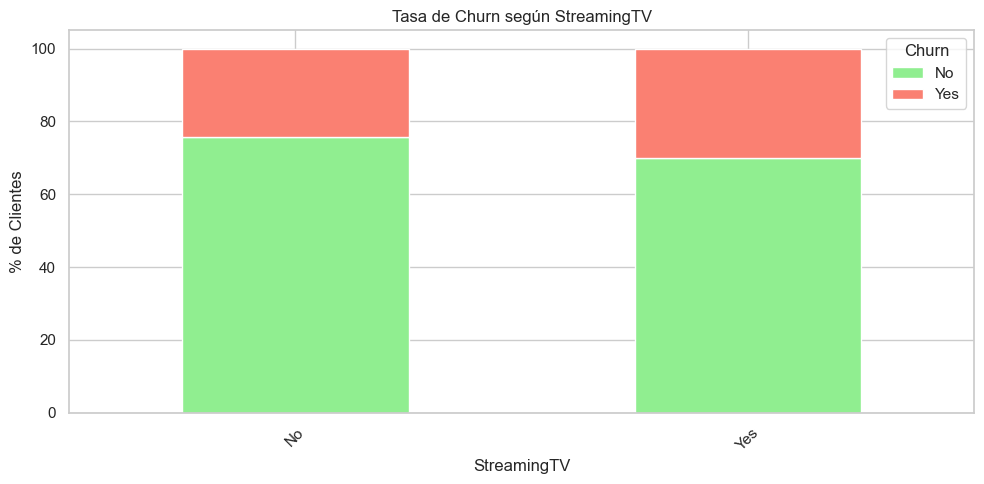

In [18]:
churn_ratio_plot('StreamingTV')


# 19. Síntesis del Análisis Exploratorio

## 19.1 Objetivo  
Identificar patrones y factores asociados al abandono de clientes (`Churn`) para generar hipótesis de negocio y orientar el desarrollo del modelo predictivo.

---

## 19.2 Principales Insights

**Perfil del cliente con mayor riesgo de churn**  
- Antigüedad baja: el abandono se concentra principalmente en clientes con menos de 6 meses de permanencia.  
- Contrato mes a mes: los clientes sin compromiso a largo plazo presentan tasas de cancelación superiores.  
- Método de pago por cheque electrónico: estos usuarios muestran mayor propensión a abandonar.  
- Falta de soporte técnico y servicios de protección (OnlineSecurity, TechSupport).  
- Consumo elevado (fibra óptica y cargos mensuales altos) sin servicios complementarios o valor percibido agregado.

**Variables numéricas más diferenciadoras**  
- `tenure`: la variable con mayor poder discriminante; a mayor antigüedad, menor churn.  
- `MonthlyCharges`: ligeramente más altos en clientes que abandonan.  
- `TotalCharges`: naturalmente más bajos en clientes con abandono debido a su corta permanencia.

---

## 19.3 Recomendaciones para el negocio

| Recomendación                            | Justificación                                                      |
|----------------------------------------|------------------------------------------------------------------|
| Promover contratos anuales o bianuales | Contratos largos muestran tasas de churn significativamente menores. |
| Incentivar bundles y upgrades           | La combinación de múltiples servicios se asocia con mayor retención. |
| Garantizar soporte técnico desde el inicio | La ausencia de TechSupport o seguridad online está ligada al abandono temprano. |
| Fomentar métodos de pago automáticos    | Métodos automáticos (transferencia, tarjeta) reducen fricción y abandono. |
| Fortalecer la experiencia en los primeros 6 meses | Etapa crítica para la fidelización, donde el churn es más pronunciado. |

---

## 19.4 Próximos pasos

- Codificar y estandarizar variables para modelado.  
- Construir un modelo de clasificación binaria.  
- Evaluar métricas técnicas (F1, ROC AUC) y de negocio (clientes retenidos, valor recuperado).

---

Este análisis constituye la base para desarrollar una solución predictiva que no solo identifique clientes en riesgo, sino que también sugiera intervenciones concretas para prevenir su abandono.
